# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_path = '/work/dataset_datacademy.csv'
df = pd.read_csv(df_path)

In [ ]:
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [ ]:
df.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


A primera vista, la media de ventas (71063.08) está muy alejada de la mediana o Q2 (34980) lo que nos habla de una muestra sesgada, donde algunos de sus integrantes se despega claramente del resto en cuanto a ventas. Mas adelante veremos de quien se trata y cuanto se despega.

In [ ]:
df_sorted = df.sort_values('Sales', ascending=False)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [ ]:
df_clipping = df_sorted.iloc[ : 5 , : ]
df_clipping

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


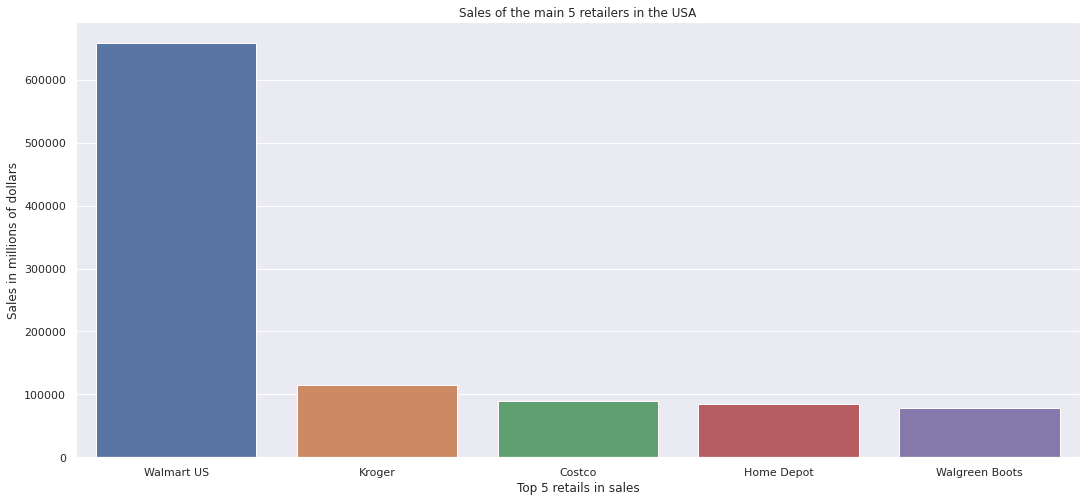

In [ ]:
chart = sns.barplot(data = df_clipping, x = 'Company', y = 'Sales')
chart.set_title('Sales of the main 5 retailers in the USA')
chart.set_xlabel('Top 5 retails in sales')
chart.set_ylabel('Sales in millions of dollars')
sns.set(rc = {'figure.figsize':(18,8)})

Efectivamente, podemos observar que Walmart US le saca una distancia de casi 6X al segundo (Kroger) en la lista de ventas. Lo cual confirma la primera impresión que teniamos al ver las medidas de tendencia central.

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
df_clipping2 = df_sorted.iloc[ 1 : , : ]
df_clipping2

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


In [ ]:
df_clipping2['Sales'].mean()

46602.416666666664

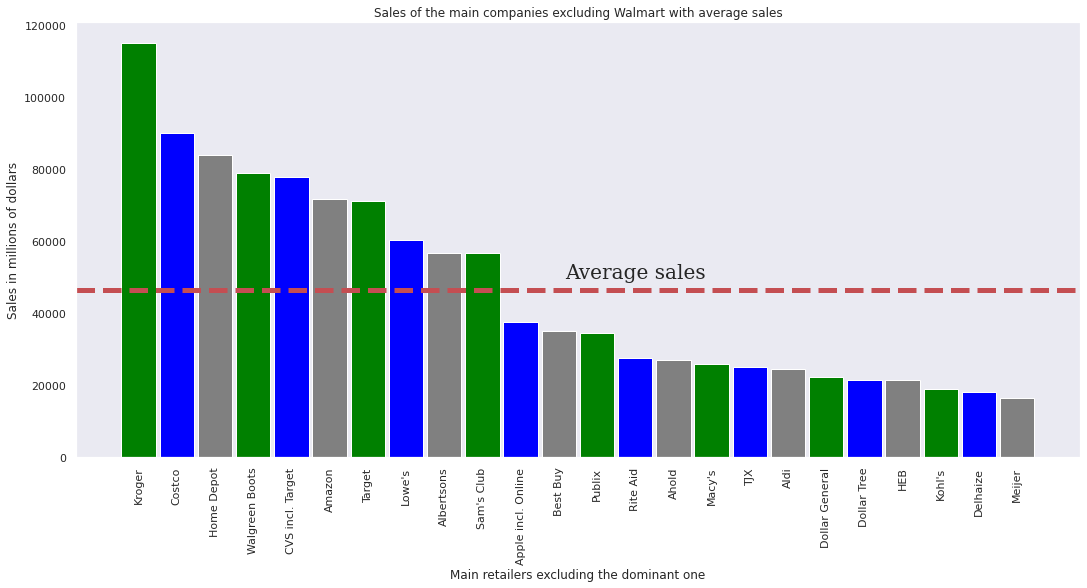

In [ ]:
plt.bar(df_clipping2['Company'], height=df_clipping2['Sales'], width = 0.9, color = ["green","blue","grey"],  )
plt.grid()
plt.axhline(df_clipping2['Sales'].mean(), color ="r", linestyle = '--', linewidth = 5)
plt.xticks(rotation='vertical')
plt.title('Sales of the main companies excluding Walmart with average sales')
plt.xlabel('Main retailers excluding the dominant one')
plt.ylabel('Sales in millions of dollars')
plt.text(x = 'Rite Aid',y = df_clipping2['Sales'].mean()+3000, s= 'Average sales', fontfamily ='serif', size = 20, ha = 'center' )
plt.show()

Como podemos observar en el gráfico, el promedio de ventas excluyendo a la compañia dominante (Walmart) es de 46602.42.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

In [ ]:
df_sorted_by_sales = df_sorted.sort_values('Sales',ascending=True)
df_sorted_by_sales

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery
22,Kohl's,19060,1169.0,16.353496,0.006024,Department Stores
21,HEB,21384,323.0,66.825000,0.018927,Grocery
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery
17,TJX,25012,2770.0,9.369545,0.078241,Apparel
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores
15,Ahold,26903,794.0,34.446863,0.033854,Grocery


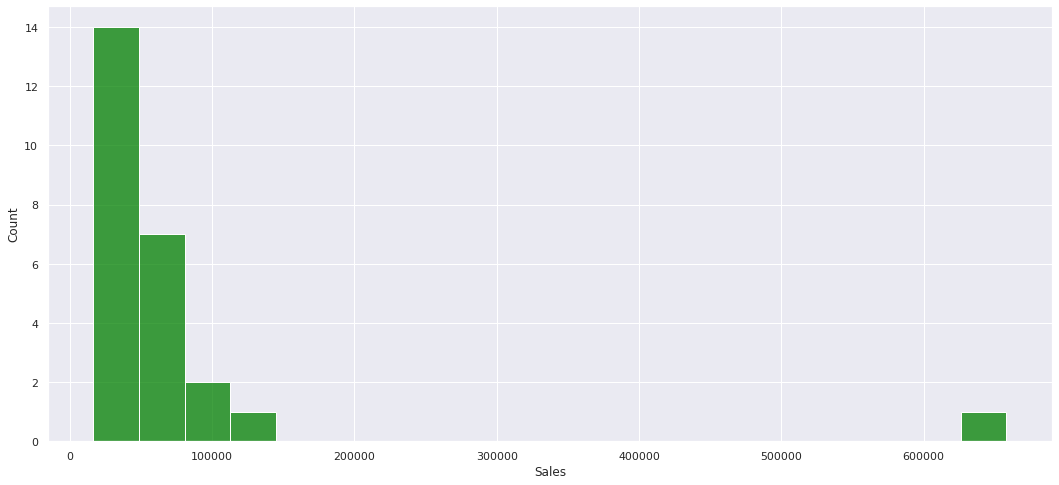

In [ ]:
sns.histplot(data = df_sorted_by_sales, x="Sales", multiple="layer", color = "green")
sns.set(rc = {'figure.figsize':(15,8)})

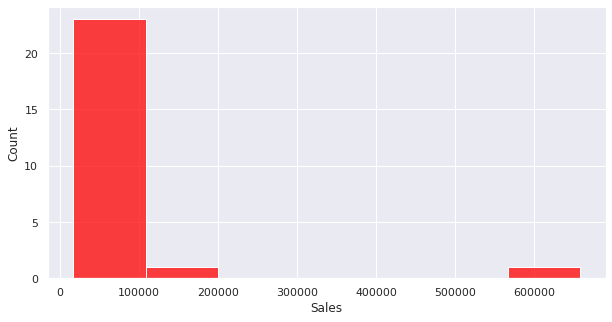

In [ ]:
sns.histplot(data = df_sorted_by_sales, x = "Sales",bins = 7, multiple = "layer", color = "red")
sns.set(rc = {'figure.figsize':(10,5)})

14 de los 25 principales retailers de USA tienen ventas anuales inferiores a los 50.000 millones de dolares. Si agrupamos en solo dos bines vemos que solo 2 de las 25 empresas tienen ventas anuales superiores a los 100.000 millones de dolares anuales, las restantes 23 están por debajo. 

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

In [ ]:
df_sorted_by_stores = df_sorted.sort_values('Stores',ascending=True)
df_sorted_by_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters
21,HEB,21384,323.0,66.825000,0.018927,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs
15,Ahold,26903,794.0,34.446863,0.033854,Grocery
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores
22,Kohl's,19060,1169.0,16.353496,0.006024,Department Stores
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery
13,Publix,34408,1351.0,25.997733,0.042438,Grocery
12,Best Buy,34980,1389.0,24.685956,-0.038754,Electronics


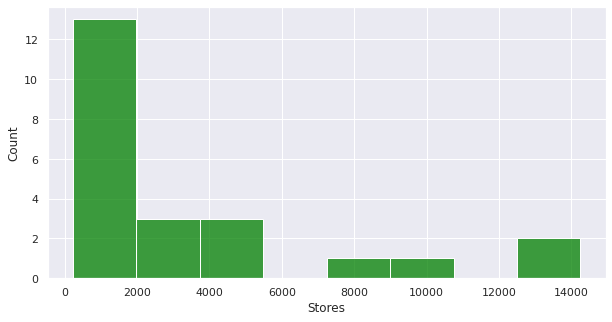

In [ ]:
sns.histplot(data = df_sorted_by_stores, x="Stores", bins=8, multiple="layer", color = "green")
sns.set(rc = {'figure.figsize':(12,6)})

13 de los 25 principales retailers en USA (la mayoría), tienen menos de 2000 tiendas.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

<AxesSubplot:xlabel='Sales', ylabel='Stores'>

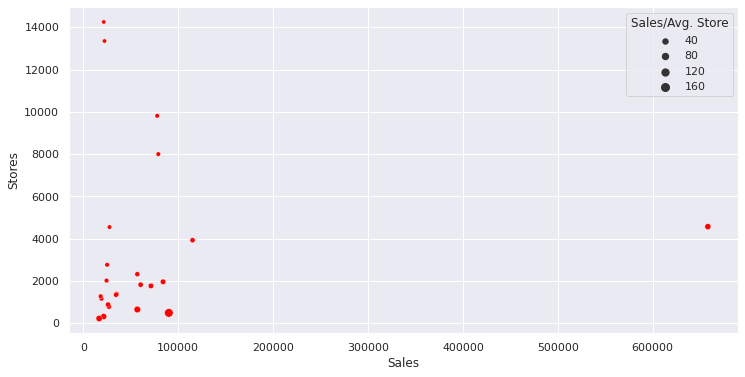

In [ ]:
sns.scatterplot(data = df_sorted, x = 'Sales', y = 'Stores', size = 'Sales/Avg. Store', color = "red")

<AxesSubplot:>

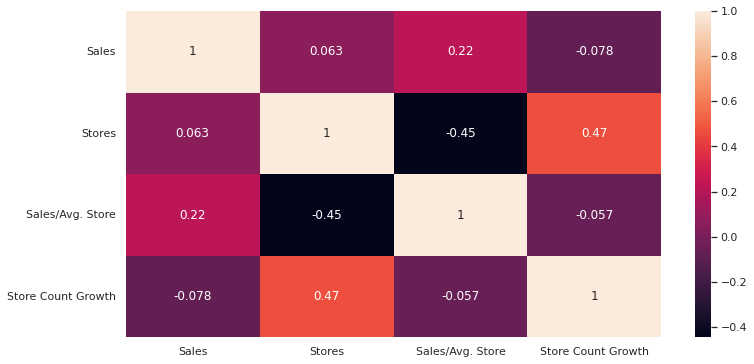

In [ ]:
sns.heatmap(df_sorted.corr(),annot=True)

Como podemos observar en el scatter plot y en el heatmap de correlación que figura debajo, no existe correlación entre cantidad de tiendas y ventas. Tenemos el ejemplo de Walmart con algo mas de 4000 tiendas y ventas mayores a 600.000 millones de dolares anuales mientras que por otro lado está el caso de Dollar Tree que tiene mas de 14.000 tiendas y menos algo mas de 21.000 millones de dolares en ventas. 

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
range_sales = df_sorted['Sales'].max() - df_sorted['Sales'].min()
range_sales

641527

El rango (diferencia entre el máximo y el minimo) que existe entre las ventas es muy amplio. Estamos hablando de 641527 millones de dolares. Como comentabamos al principio, incluso la diferencia entre Walmart y Kroger es de casi 6X. 

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [ ]:
df_sorted_by_stores2 = df_sorted.sort_values('Stores',ascending=False)
df_sorted_by_stores2 = df_sorted_by_stores2.iloc[ : 5, : ]
df_sorted_by_stores2

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


In [ ]:
df_sorted_by_sales2 = df_sorted.sort_values('Sales',ascending=False)
df_sorted_by_sales2 = df_sorted_by_sales2.iloc[ : 5, : ]
df_sorted_by_sales2

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


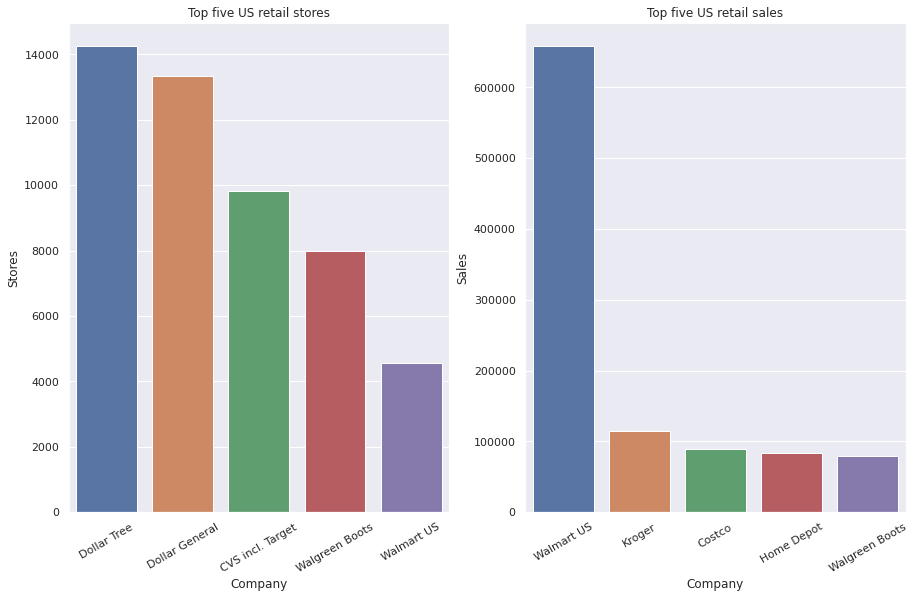

In [ ]:
fig , ax = plt.subplots(1,2,figsize = (15,9))
sns.barplot(data = df_sorted_by_stores2, x = 'Company', y = 'Stores', ax = ax[0])
ax[0].set_title('Top five US retail stores')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 30)
sns.barplot(data = df_sorted_by_sales2, x = 'Company', y = 'Sales', ax = ax[1])
ax[1].set_title('Top five US retail sales')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 30)
plt.show()

Como podemos observar en el gráfico de arriba las 5 empresas con mas tiendas son: 
Dollar Tree con 14250 tiendas.
Dollar General con 13350 tiendas.
CVS incl. Target con 9813 tiendas.
Walgreen Boots con 8002 tiendas.
Walmart US con 4574 tiendas. 
La única de ellas que se encuentra en el top five de empresas con mas ventas es Walmart US quien encabeza esta lista con 658119 millones de dolares por año. 



## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [ ]:
df_group_by_category = df_sorted.groupby(['Category']).agg({'Sales' : 'sum'})
df_group_by_category = df_group_by_category.reset_index()
df_group_by_category = df_group_by_category.sort_values('Sales',ascending=False)
df_group_by_category

,Category,Sales
8,Supercenters,745919
6,Grocery,297164
3,Drug Stores,184202
7,Home Improvement,144287
9,Warehouse Club,90048
4,Electronic/Mail Order,71687
10,Warehouse Clubs,56828
1,Department Stores,45088
2,Dollar Stores,43698
5,Electronics,34980


<AxesSubplot:xlabel='Category', ylabel='Sales'>

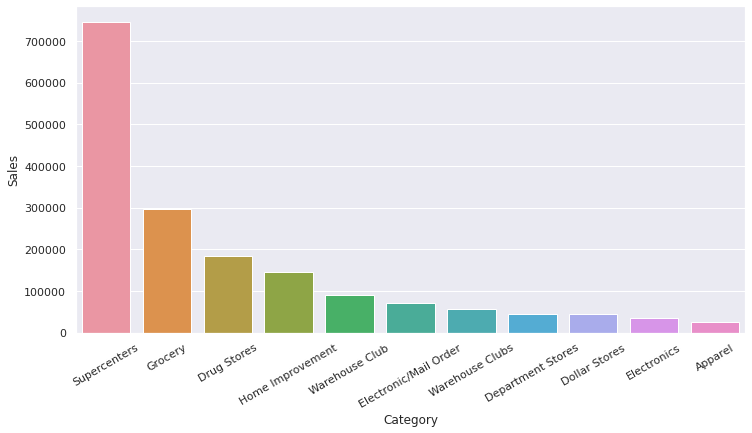

In [ ]:
chart2 = sns.barplot(data = df_group_by_category, x = 'Category', y = 'Sales')
chart2.set_xticklabels(chart2.get_xticklabels(),rotation = 30)
chart2

Como se observa en el gráfico anterior, la categoría de retailers que generó mas ventas es la de "Supercenters" con un total de ventas anuales de 745919 millones de dolares.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [ ]:
df_sorted['Sales/Avg. Store_2'] = df_sorted['Sales'] / df_sorted['Stores'] 
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store_2
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,24.432072


Aquí arranco con una aclaración importante. Si bien 'Sales/Avg. Store' pretende mostrar el promedio de venta por tienda física, cuando uno recalcula este número (como realice en la columna calculada 'Sales/Avg. Store_2') nota que el calculo es, en principio equivocado. Por este motivo voy a basar mi respuesta en los valores de la columna calculada 'Sales/Avg. Store_2'

In [ ]:
df_sorted_by_sales_stores = df_sorted.sort_values('Sales/Avg. Store_2',ascending=False)
df_sorted_by_sales_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store_2
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840
21,HEB,21384,323.0,66.825000,0.018927,Grocery,66.204334
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840


<AxesSubplot:xlabel='Company', ylabel='Sales/Avg. Store_2'>

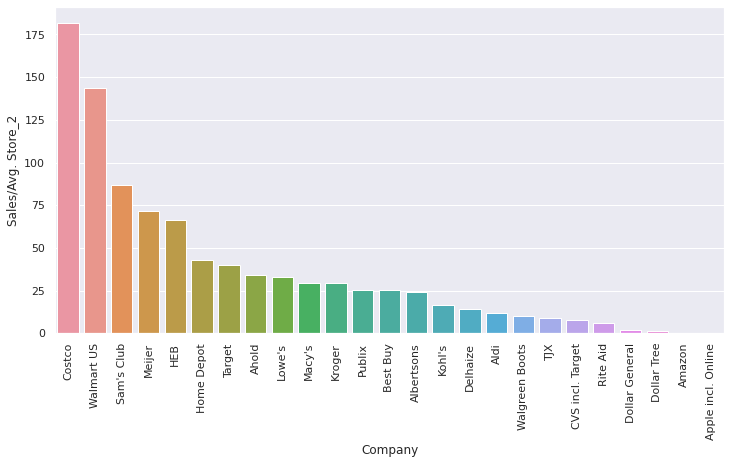

In [ ]:
chart3 = sns.barplot(data = df_sorted_by_sales_stores, x = 'Company', y = 'Sales/Avg. Store_2')
chart3.set_xticklabels(chart3.get_xticklabels(),rotation = 90)
chart3

La compañia que en relación con su cantidad de tiendas obtiene mas ventas es Costco con un promedio de 181.91 millones de dolares anuales por tienda física. 

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Dentro del dataset con el que trabaje no cuento con la información sobre cuales de los 25 retailers mas grandes de USA venden de forma exclusivamente online. Por lo que tuve que investigarlo de forma particular en internet y sumar este dato al dataset.

In [ ]:
my_dict = {
    "Walmart US":"No",
    "Kroger":"Yes",
    "Costco":"No",
    "Home Depot":"No",
    "Walgreen Boots":"No",
    "CVS incl. Target":"No",
    "Amazon":"Yes",
    "Target":"No",
    "Lowe's":"No",
    "Albertsons":"No",
    "Sam's Club":"No",
    "Apple incl. Online":"Yes",
    "Best Buy":"Yes",
    "Publix":"No",
    "Rite Aid":"No",
    "Ahold":"Yes",
    "Macy's":"No",
    "TJX":"Yes",
    "Aldi":"No",
    "Dollar General":"No",
    "Dollar Tree":"No",
    "HEB":"No",
    "Kohl's":"No",
    "Delhaize":"No",
    "Meijer":"No"
}
df_sorted_by_sales_stores['Only online'] = df_sorted_by_sales_stores['Company'].map(my_dict)
df_sorted_by_sales_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store_2,Only online
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152,No
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597,No
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305,No
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840,No
21,HEB,21384,323.0,66.825000,0.018927,Grocery,66.204334,No
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878,No
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102,No
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872,Yes
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888,No
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840,No


In [ ]:
df_filter = df_sorted_by_sales_stores[df_sorted_by_sales_stores['Only online'] == 'Yes']
df_filter = df_filter.sort_values('Sales',ascending=False)
df_filter

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store_2,Only online
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055,Yes
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN,Yes
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,NaN,Yes
12,Best Buy,34980,1389.0,24.685956,-0.038754,Electronics,25.183585,Yes
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872,Yes
17,TJX,25012,2770.0,9.369545,0.078241,Apparel,9.029603,Yes


<AxesSubplot:title={'center':'Sales in millions of dollars from online retailers'}, xlabel='Sales in millions of dollars', ylabel='Companies that sell exclusively online'>

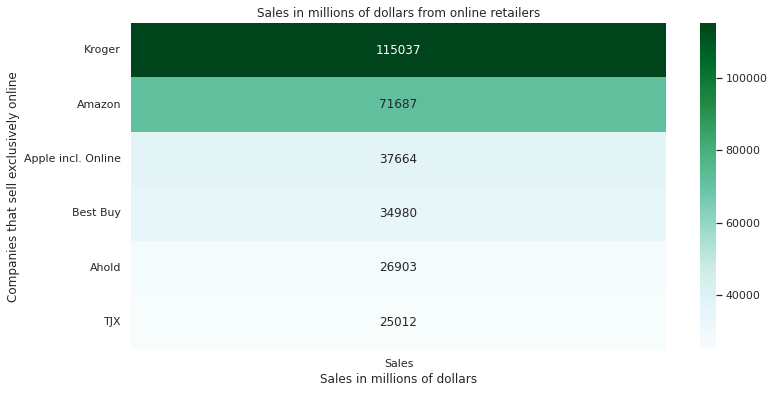

In [ ]:
df_filter_slice = df_filter.iloc[ : , : 2]
df_filter_slice = df_filter_slice.set_index('Company')
chart4 = sns.heatmap(data = df_filter_slice, cmap='BuGn', annot=True, fmt='d')
chart4.set_title("Sales in millions of dollars from online retailers")
chart4.set_ylabel("Companies that sell exclusively online")
chart4.set_xlabel("Sales in millions of dollars")
chart4

Como podemos observar, las compañias de retail que venden de forma exclusivamente online son: 

Kroger

Amazon

Apple incl. Online

Best Buy

Ahold

TJX

In [ ]:
import altair as alt

alt.Chart(df_sorted_by_sales_stores).mark_bar(size=10).encode(
    x='Company',
    y='sum(Sales)',
    color='sum(Sales)',
    column='Only online'
).properties(width=350,height=350)

alt.Chart(...)

Como podemos observar, no hay diferencias significativas entre aquellos retailers que tienen solo venden online y aquellos que tienen tiendas fisicas en cuanto a suma de ventas. La única empresa que destaca sobre el resto es Walmart como ya lo mostramos mas arriba. 

## III. Tus propias preguntas

In [ ]:
df_sorted_by_sales_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store_2,Only online
2,Costco,90048,495.00,187.80,0.07,Warehouse Club,181.92,No
0,Walmart US,658119,"4,574.00",65.65,0.01,Supercenters,143.88,No
10,Sam's Club,56828,655.00,87.29,0.01,Warehouse Clubs,86.76,No
24,Meijer,16592,231.00,74.74,0.08,Supercenters,71.83,No
21,HEB,21384,323.00,66.83,0.02,Grocery,66.20,No
3,Home Depot,83976,"1,965.00",42.74,0.00,Home Improvement,42.74,No
7,Target,71208,"1,772.00",39.98,-0.01,Supercenters,40.19,No
15,Ahold,26903,794.00,34.45,0.03,Grocery,33.88,Yes
8,Lowe's,60311,"1,828.00",33.31,0.02,Home Improvement,32.99,No
16,Macy's,26028,889.00,30.44,0.08,Department Stores,29.28,No


## 10. ¿Que dispersión de ventas encontramos entre los 25 principales retailers de USA? 

El rango de ventas ya lo hemos encontrado mas arriba por lo que lo traemos nuevamente. Pero a este dato le vamos a agregar el calulo del rango intercuartil, la desviación estandar y graficaremos la dispersión de ventas con un boxplot.

In [ ]:
range_sales = df_sorted['Sales'].max() - df_sorted['Sales'].min()
range_sales

641527

In [ ]:
Q1 = df_sorted['Sales'].quantile(0.25)
Median = df_sorted['Sales'].median()
Q2 = df_sorted['Sales'].quantile(0.5)
Q3 = df_sorted['Sales'].quantile(0.75)
Min = df_sorted["Sales"].min()
Max = df_sorted["Sales"].max()
[Min, Q1, Median, Q2, Q3, Max]

[16592, 24402.0, 34980.0, 34980.0, 71687.0, 658119]

In [ ]:
iqr = Q3 - Q1
iqr 

47285.0

In [ ]:
df_sorted['Sales'].std()

125405.72764395573

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

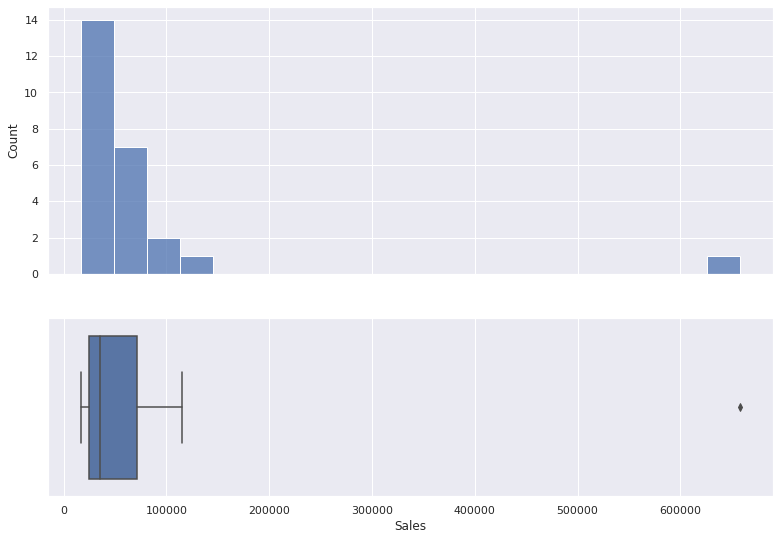

In [ ]:
sns.set(rc={'figure.figsize':(13,9)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df_sorted['Sales'], ax=ax_hist)
sns.boxplot(df_sorted['Sales'], ax=ax_box)
ax_hist.set(xlabel='')

Como podemos observar las ventas de los 25 principales retailers de USA presentan un rango de 641527 millones de dolares, un rango intercuartil de 47285 millones de dolares y una desviación estandar de 125405,72 millones de dolares. Podemos ubicar dentro de esta dispersión a un unico outlier, el cual es claramente Walmart US. 

### 11. ¿Que dispersión de tiendas encontramos entre los 25 principales retailers de USA? 

In [ ]:
range_stores = df_sorted['Stores'].max() - df_sorted['Stores'].min()
range_stores

14019.0

In [ ]:
Q1_2 = df_sorted['Stores'].quantile(0.25)
Median_2 = df_sorted['Stores'].median()
Q2_2 = df_sorted['Stores'].quantile(0.5)
Q3_2 = df_sorted['Stores'].quantile(0.75)
Min_2 = df_sorted["Stores"].min()
Max_2 = df_sorted["Stores"].max()
[Min_2, Q1_2, Median_2, Q2_2, Q3_2, Max_2]

[231.0, 1029.0, 1828.0, 1828.0, 4242.0, 14250.0]

In [ ]:
iqr = Q3 - Q1
iqr 

3213.0

In [ ]:
df_sorted['Stores'].std()

4038.708713821636

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

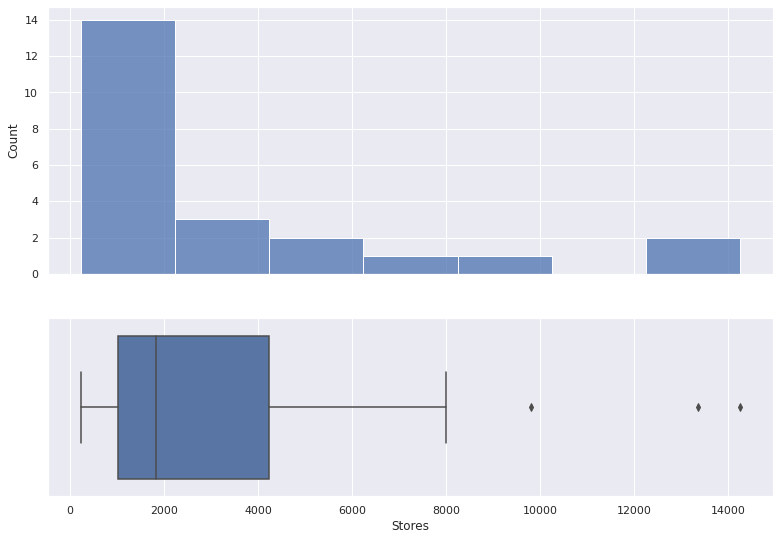

In [ ]:
sns.set(rc={'figure.figsize':(13,9)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df_sorted['Stores'], ax=ax_hist)
sns.boxplot(df_sorted['Stores'], ax=ax_box)
ax_hist.set(xlabel='')

Como podemos observar la cantidad de tiendas de los 25 principales retailers de USA presentan un rango de 14019 tiendas, un rango intercuartil de 3213 tiendas y una desviación estandar de 4038,70 tiendas. Podemos ubicar dentro de esta dispersión a tres outliers: Dolar Tree con 14250 tiendas, Dolar General con 13350 tiendas y CVS incl. Target con 9813 tiendas. 

### 12. Entre las tiendas que solo venden de forma online ¿Es mayor o menor la dispersión de ventas y tiendas? 

In [ ]:
df_filter

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Avg. Store_2,Only online
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055,Yes
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN,Yes
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,NaN,Yes
12,Best Buy,34980,1389.0,24.685956,-0.038754,Electronics,25.183585,Yes
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872,Yes
17,TJX,25012,2770.0,9.369545,0.078241,Apparel,9.029603,Yes


In [ ]:
range_sales = df_filter['Sales'].max() - df_filter['Sales'].min()
range_sales

90025

In [ ]:
range_stores = df_filter['Stores'].max() - df_filter['Stores'].min()
range_stores

3137.0

In [ ]:
Q1 = df_filter['Sales'].quantile(0.25)
Median = df_filter['Sales'].median()
Q2 = df_filter['Sales'].quantile(0.5)
Q3 = df_filter['Sales'].quantile(0.75)
Min = df_filter["Sales"].min()
Max = df_filter["Sales"].max()
[Min, Q1, Median, Q2, Q3, Max]

[25012, 28922.25, 36322.0, 36322.0, 63181.25, 115037]

In [ ]:
Q1_2 = df_filter['Stores'].quantile(0.25)
Median_2 = df_filter['Stores'].median()
Q2_2 = df_filter['Stores'].quantile(0.5)
Q3_2 = df_filter['Stores'].quantile(0.75)
Min_2 = df_filter["Stores"].min()
Max_2 = df_filter["Stores"].max()
[Min_2, Q1_2, Median_2, Q2_2, Q3_2, Max_2]

[794.0, 1240.25, 2079.5, 2079.5, 3060.25, 3931.0]

In [ ]:
iqr_sales = Q3 - Q1
iqr_sales 

34259.0

In [ ]:
iqr_stores = Q3_2 - Q1_2
iqr_stores

1820.0

In [ ]:
df_filter['Sales'].std()

35254.98122393487

In [ ]:
df_filter['Stores'].std()

1408.7883683032974

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

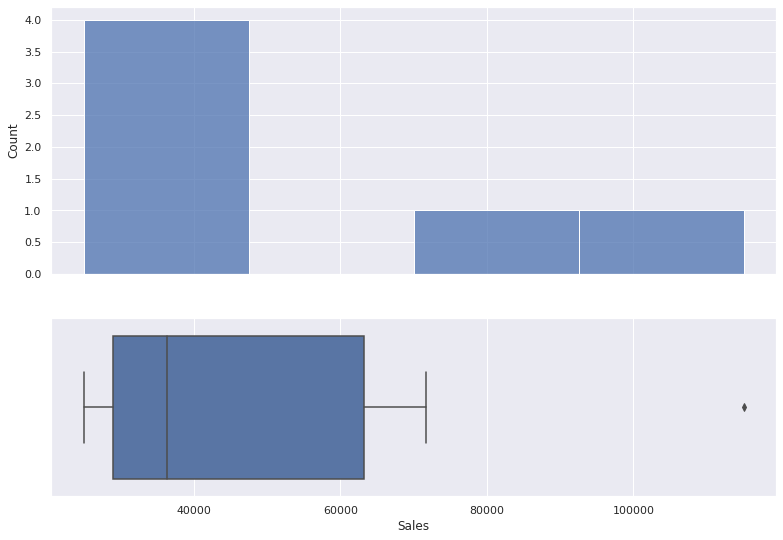

In [ ]:
sns.set(rc={'figure.figsize':(13,9)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df_filter['Sales'], ax=ax_hist)
sns.boxplot(df_filter['Sales'], ax=ax_box)
ax_hist.set(xlabel='')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

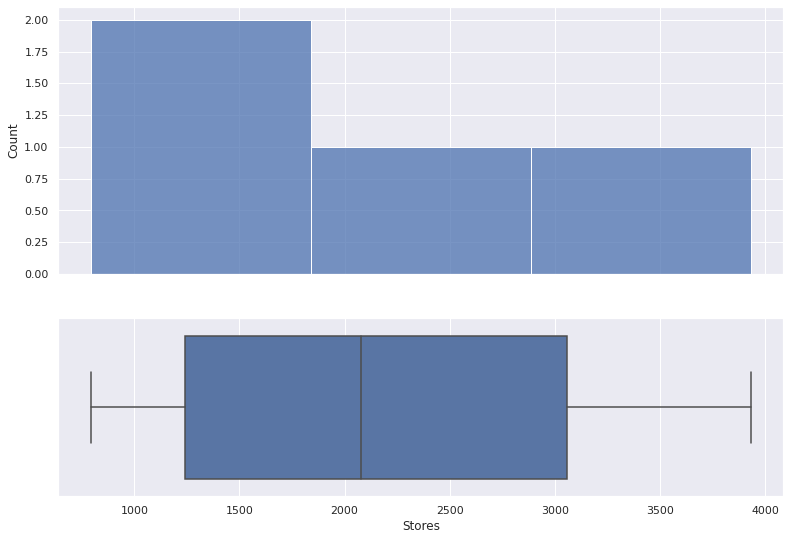

In [ ]:
sns.set(rc={'figure.figsize':(13,9)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df_filter['Stores'], ax=ax_hist)
sns.boxplot(df_filter['Stores'], ax=ax_box)
ax_hist.set(xlabel='')

Podemos observar que la dispersión disminuye cuando solo miramos a aquellos retailers que operan exclusivamente online al menos en cuanto a cantidad de tiendas. En este caso estamos hablando de tiendas que no están abiertas al publico sino que funcionan como centros de almacenamiento y distribución desde donde se entregan los pedidos una vez realizados. En cuanto a ventas la dispersión también se ve disminuida, pero seguimos manteniendo un outlier entre nuestra muestra. En este caso se trata de Kroger. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c77d4a12-dba5-4d4a-988a-9a5d203bebf9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>